# importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading an excel file and converting it into dataframe

In [2]:
customers = pd.read_csv("/kaggle/input/airlines-customer-sentiment-dataset/customers1.csv")
bookings = pd.read_csv("/kaggle/input/airlines-customer-sentiment-dataset/bookings1.csv")
flights = pd.read_csv("/kaggle/input/airlines-customer-sentiment-dataset/flights1.csv")
reviews = pd.read_csv("/kaggle/input/airlines-customer-sentiment-dataset/reviews1.csv")
safety = pd.read_csv("/kaggle/input/airlines-customer-sentiment-dataset/safety_log1.csv")

# Merging all dataframes in a single dataframe 

In [3]:
customers = customers.merge(bookings)
flights = flights.merge(reviews)

# Getting a sneak peek of data

In [4]:
customers.sample(3)

,customer_id,customer_name,date_of_birth,city,contact,booking_id,from_city,to_city,booking_date,duration,fare,total_seat_booked
71,73,Aishani D’Alia,1959-04-14,Bangalore,aishanid’alia@gmail.com,271,Chennai,Bangalore,2025-06-06 01:07:31,4,4197,4
589,584,Girik Nair,1997-02-23,New York,giriknair@gmail.com,1216,London,Kolkata,2025-01-09 01:05:10,6,23703,1
24,25,Gavin Batta,1959-08-22,Dubai,gavinbatta@gmail.com,405,Mumbai,New York,2025-07-29 01:15:13,11,15519,3


In [5]:
flights.sample(3)

,flight_id,airline,shuttle,airport_name,airport_id,class,dep_time,arr_time,customer_name,customer_id,booking_id,review_text,seat_comfort,cabin_staff_service,food_and_beverages,value_for_money,overall_rating,recommend
1402,FL216,Vistara,NaN,Dubai Intl,DUB_Singapore,Business,2025-03-09 10:16:12,2025-03-09 13:16:12,Sneha Nagar,617,617,"Staff was rude, not recommended.",10,9,7,Yes,7,Yes
178,FL31,SpiceJet,Yes,Dubai Intl,DUB_London,Business,2025-02-20 11:03:23,2025-02-20 14:03:23,Amruta Saha,828,828,NaN,8,10,9,Yes,9,Yes
244,FL40,SpiceJet,Yes,Netaji Subhas,NET_Hyderabad,Premium,2025-05-01 12:20:01,2025-05-01 14:20:01,Arya Shere,52,52,NaN,4,7,5,No,5,No


In [6]:
# LET'S SEE ALL THE COLUMNS OF OUR DATASET

In [7]:
customers.columns

Index(['customer_id', 'customer_name', 'date_of_birth', 'city', 'contact',
       'booking_id', 'from_city', 'to_city', 'booking_date', 'duration',
       'fare', 'total_seat_booked'],
      dtype='object')

In [8]:
flights.columns

Index(['flight_id', 'airline', 'shuttle', 'airport_name', 'airport_id',
       'class', 'dep_time', 'arr_time', 'customer_name', 'customer_id',
       'booking_id', 'review_text', 'seat_comfort', 'cabin_staff_service',
       'food_and_beverages', 'value_for_money', 'overall_rating', 'recommend'],
      dtype='object')

In [9]:
# LETS LOOK AT THE SHAPE OF BOTH DATASETS

In [10]:
print("Total rows : " ,customers.shape[0],"Total columns : ",customers.shape[1])
print("Total rows : " ,flights.shape[0],"Total columns : ",flights.shape[1])

Total rows :  2000 Total columns :  12
Total rows :  2000 Total columns :  18


In [11]:
#  for now we have understood the structure of the datasets so we will now move to understand its datatype 

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        2000 non-null   int64 
 1   customer_name      2000 non-null   object
 2   date_of_birth      1910 non-null   object
 3   city               2000 non-null   object
 4   contact            1932 non-null   object
 5   booking_id         2000 non-null   int64 
 6   from_city          2000 non-null   object
 7   to_city            2000 non-null   object
 8   booking_date       2000 non-null   object
 9   duration           2000 non-null   int64 
 10  fare               2000 non-null   int64 
 11  total_seat_booked  2000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 187.6+ KB


In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            2000 non-null   object
 1   airline              2000 non-null   object
 2   shuttle              1398 non-null   object
 3   airport_name         2000 non-null   object
 4   airport_id           2000 non-null   object
 5   class                2000 non-null   object
 6   dep_time             2000 non-null   object
 7   arr_time             2000 non-null   object
 8   customer_name        2000 non-null   object
 9   customer_id          2000 non-null   int64 
 10  booking_id           2000 non-null   int64 
 11  review_text          1655 non-null   object
 12  seat_comfort         2000 non-null   int64 
 13  cabin_staff_service  2000 non-null   int64 
 14  food_and_beverages   2000 non-null   int64 
 15  value_for_money      2000 non-null   object
 16  overal

In [14]:
# lets look at the null distribution

In [15]:
customers.isnull().sum().sum()

158

In [16]:
flights.isnull().sum().sum()

947

# Observations till now

# Handling NAN values

In [17]:
customers.isnull().sum().sort_values(ascending = False)

date_of_birth        90
contact              68
customer_id           0
customer_name         0
city                  0
booking_id            0
from_city             0
to_city               0
booking_date          0
duration              0
fare                  0
total_seat_booked     0
dtype: int64

In [18]:
flights.isnull().sum().sort_values(ascending = False)

shuttle                602
review_text            345
flight_id                0
booking_id               0
overall_rating           0
value_for_money          0
food_and_beverages       0
cabin_staff_service      0
seat_comfort             0
customer_id              0
airline                  0
customer_name            0
arr_time                 0
dep_time                 0
class                    0
airport_id               0
airport_name             0
recommend                0
dtype: int64

In [19]:
((customers.isnull().sum())/(customers.shape[0])).sort_values(ascending = False)

date_of_birth        0.045
contact              0.034
customer_id          0.000
customer_name        0.000
city                 0.000
booking_id           0.000
from_city            0.000
to_city              0.000
booking_date         0.000
duration             0.000
fare                 0.000
total_seat_booked    0.000
dtype: float64

In [20]:
((flights.isnull().sum())/flights.shape[0]).sort_values(ascending = False)

shuttle                0.3010
review_text            0.1725
flight_id              0.0000
booking_id             0.0000
overall_rating         0.0000
value_for_money        0.0000
food_and_beverages     0.0000
cabin_staff_service    0.0000
seat_comfort           0.0000
customer_id            0.0000
airline                0.0000
customer_name          0.0000
arr_time               0.0000
dep_time               0.0000
class                  0.0000
airport_id             0.0000
airport_name           0.0000
recommend              0.0000
dtype: float64

In [21]:
print("Total number of NAN values in dataframe 1 :",customers.isnull().sum().sum(),"out of ",customers.shape[0])
print("Total number of NAN values in dataframe 2 :",flights.isnull().sum().sum(),"out of ",flights.shape[0])

Total number of NAN values in dataframe 1 : 158 out of  2000
Total number of NAN values in dataframe 2 : 947 out of  2000


# Let's see our NAN values using graph

[]

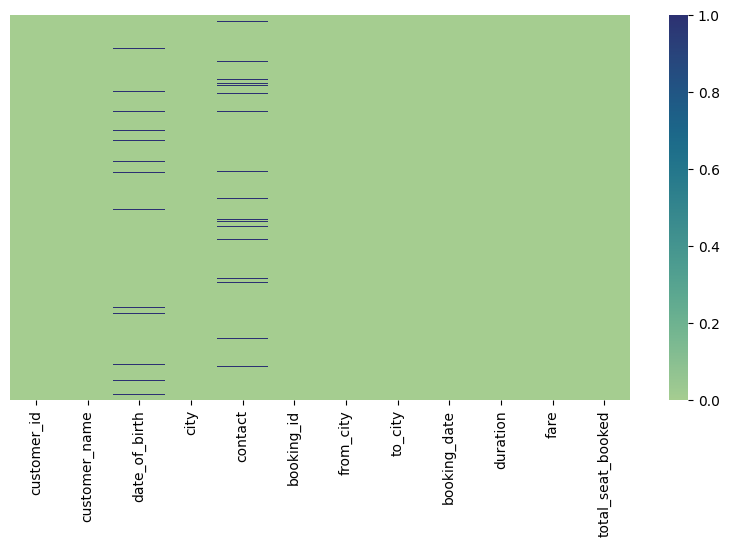

In [22]:
plt.figure(figsize = (10,5))
sns.heatmap(customers.isnull(),yticklabels=False,cmap='crest')
plt.plot()

[]

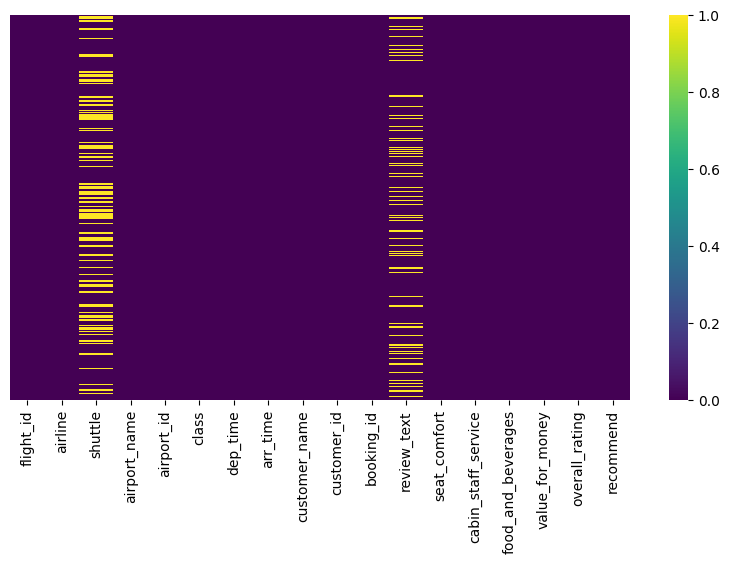

In [23]:
plt.figure(figsize = (10,5))
sns.heatmap(flights.isnull(),cmap = 'viridis',yticklabels=False)
plt.plot()

# Now we will look at rows with null values

In [24]:
customers[customers['date_of_birth'].isnull()].head()

,customer_id,customer_name,date_of_birth,city,contact,booking_id,from_city,to_city,booking_date,duration,fare,total_seat_booked
0,1,Aryan Maharaj,NaN,London,aryanmaharaj@gmail.com,946,London,Bangalore,2025-03-12 08:47:48,2,13568,5
1,1,Aryan Maharaj,NaN,London,aryanmaharaj@gmail.com,1042,Mumbai,Hyderabad,2025-01-30 01:55:42,9,11713,3
12,10,Caleb Sharaf,NaN,Kolkata,calebsharaf@gmail.com,1572,New York,Kolkata,2025-06-26 15:06:59,7,14112,1
15,13,Bimala Buch,NaN,Dubai,bimalabuch@gmail.com,941,Kolkata,Singapore,2025-03-19 01:20:17,3,4325,3
126,133,Siddharth Sha,NaN,Mumbai,siddharthsha@gmail.com,458,Kolkata,Chennai,2025-08-01 19:49:25,6,25028,1


In [25]:
customers[customers['contact'].isnull()].head()

,customer_id,customer_name,date_of_birth,city,contact,booking_id,from_city,to_city,booking_date,duration,fare,total_seat_booked
26,26,Nathaniel Sami,1953-05-12,Singapore,NaN,556,Hyderabad,Singapore,2025-01-08 16:02:58,5,7517,1
27,26,Nathaniel Sami,1953-05-12,Singapore,NaN,952,Dubai,London,2025-03-31 02:00:56,6,15673,3
35,32,Michael Prakash,1966-09-14,Kolkata,NaN,1604,Bangalore,Kolkata,2025-07-19 00:39:10,2,3842,3
105,113,Zarna Shetty,1951-07-21,Chennai,NaN,1420,Bangalore,New York,2025-02-13 05:04:49,2,4316,4
106,113,Zarna Shetty,1951-07-21,Chennai,NaN,1962,Hyderabad,Mumbai,2025-03-11 09:23:27,5,8371,3


In [26]:
flights[flights['shuttle'].isnull()].head()

,flight_id,airline,shuttle,airport_name,airport_id,class,dep_time,arr_time,customer_name,customer_id,booking_id,review_text,seat_comfort,cabin_staff_service,food_and_beverages,value_for_money,overall_rating,recommend
5,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Forum Sabharwal,195,195,NaN,11,7,8,Yes,9,Yes
6,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Dayamai Rao,412,412,"Staff was rude, not recommended.",7,4,6,No,4,No
7,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Leela Chakraborty,676,676,"Staff was rude, not recommended.",5,5,9,No,5,No
8,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Amruta Goswami,1085,1085,"Seats were cramped, food was okay.",4,5,4,No,4,No
9,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Gagan Buch,1516,1516,"Seats were cramped, food was okay.",5,7,6,No,5,No


In [27]:
flights[flights['review_text'].isnull()].head()

,flight_id,airline,shuttle,airport_name,airport_id,class,dep_time,arr_time,customer_name,customer_id,booking_id,review_text,seat_comfort,cabin_staff_service,food_and_beverages,value_for_money,overall_rating,recommend
5,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Forum Sabharwal,195,195,NaN,11,7,8,Yes,9,Yes
12,FL2,Air India,NaN,IGI Airport,IGI_New York,Premium,2025-03-14 12:05:47,2025-03-14 19:05:47,Wishi Venkataraman,1965,1965,NaN,5,7,8,Yes,7,Yes
14,FL3,Akasa Air,NaN,Chhatrapati Shivaji,CHH_Singapore,Business,2025-03-19 06:48:09,2025-03-19 07:48:09,Hemal Warrior,1389,1389,NaN,2,0,2,No,2,No
15,FL3,Akasa Air,NaN,Chhatrapati Shivaji,CHH_Singapore,Business,2025-03-19 06:48:09,2025-03-19 07:48:09,Arunima Hayre,1544,1544,NaN,7,6,7,No,5,No
17,FL3,Akasa Air,NaN,Chhatrapati Shivaji,CHH_Singapore,Business,2025-03-19 06:48:09,2025-03-19 07:48:09,Gautam Dhingra,1592,1592,NaN,6,9,5,Yes,7,Yes


# Observation set 2

In [35]:
flights['review_text'].fillna('No Reviews',inplace = True)

In [34]:
flights['shuttle'].fillna(method = 'bfill',inplace = True)

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
flights.isnull().sum().sum()

0

# First Milestone: 

# Finding Duplicate values 

In [32]:
print(customers.duplicated().any())
print(flights.duplicated().any())

False
False


# second Milestone:

# SENTIMENT ANALYSIS

NOTE -- The Analysis part is perfomed using my sql. 